# Ranking colleges 
### By Geneustace Wicaksono (Gene)
Given 12 indicators, we will assign each of them a ranking, which will then be used to rank each of these "colleges." Different criteria mean more to me than others, so I will be assigning each indicator a certain weight.

Lets import the necessary modules:

In [32]:
import pandas as pd
import numpy as np

In [33]:
coldata = pd.read_csv("col_ranking.csv")
coldata.head(10)

,Name,Academic Reputation,% freshmen in top 10% of HS class,SAT/ACT 25th-75th %ile,acceptance rate,financial resources rank,student-faculty ratio,% faculty who are full-time,% of classes under 20,% of classes with 50 or more,average alumni giving rate,average freshman retention rate,6 year grad rate
0,Benedict Arnold U,25,87%,1360 - 1490,29%,36,12:01,96.60%,55.40%,10%,41%,98%,96%
1,Cal Ripken U,21,85%,1340-1540,21%,22,6:01,93.80%,69.20%,8%,32%,97%,92%
2,Diplomas-R-Us,1,99%,1400-1580,9%,10,6:01,91.80%,71.30%,11%,61%,98%,96%
3,Duchess U,7,90%,1310-1500,18%,17,11:01,98.20%,54.20%,19%,32%,96%,93%
4,Emory Board,12,96%,1350-1530,14%,8,6:01,84.20%,71.50%,9%,36%,98%,96%
5,Fly-By-Night U,13,95%,1350-1530,16%,13,8:01,96.70%,71.10%,6%,36%,97%,94%
6,Hall U,1,94.60%,1390-1590,7%,3,7:01,95%,79.5%,8%,35%,97%,97%
7,Karweit U,1,90%,1360-1550,7%,12,6:01,99.60%,70.40%,13%,34%,98%,95%
8,Koresh U,7,96%,1470-1580,13%,1,3:01,98.40%,64.30%,10%,36%,98%,90%
9,Londontown U,7,87%,1300-1510,21%,4,9:01,98.00%,67.80%,11%,38%,97%,92%


First, lets see what we are working with: The columns are specified here:

In [34]:
print(coldata.columns)

Index(['Name', 'Academic Reputation', '% freshmen in top 10% of HS class',
       'SAT/ACT        25th-75th %ile', 'acceptance rate ',
       'financial resources rank', 'student-faculty ratio',
       '% faculty who are full-time ', '% of classes under 20 ',
       '% of classes with 50 or more ', 'average alumni giving rate',
       'average freshman retention rate', '6 year grad rate '],
      dtype='object')


Now, we can do some preprocessing.

### Preprocessing

A lot of these values are crazy. For example, the SAT scores would have to have incredibly small weights to have the same impact on the final scores due to the simple high number. (1540, 1390, etc). This is also applicable to reputation, rank, etc. 

This problem can be fixed with standardation. The formula for standardation is as follows:
$$
z = \frac{x-\mu}{\sigma}
$$

By standarding, you standardize the data, which allows for easier comparison and analysis. Z-scores represent the number of standard deviations a data point is away from the mean, providing a standardized measurement across different scales and distributions.

#### String values
Since i downloaded the data from a csv, many of the columns have string values. I parse these into decimal values before working with them. The code for both standardization and parsing string values is shown below:

In [35]:
def get_mid(s:str):
    first, last = list(map(float, s.split("-")))
    return (first + last)/ 2

def standardize_score(col:pd.Series, sat=False, method="z-normal") -> float:
    """Gets the z-statistic of the score. The distribution of SAT scores is nearly normal, so this works"""
    if sat:
        col = col.apply(get_mid)
    if method == "z-normal":
        m = col.mean()
        sd = col.std()
        return col.apply(lambda x: (x-m)/sd)
    if method == "tanh":
        return col.apply(lambda x: np.tanh(x/2.5))


def standardize_academic_reptation(col:pd.Series) -> float:
    m = col.mean()
    sd = col.std()
    return col.apply(lambda x: (x-m)/sd)



def turn_percent_into_dec(s:str) -> float:
    if s[-1] == "%":
        return float(s.split("%")[0]) / 100
    else:
        return s

for c in coldata.columns:
    try:
        coldata[c] = coldata[c].apply(turn_percent_into_dec)
    except:
        pass

coldata["Academic Reputation"] = standardize_academic_reptation(coldata["Academic Reputation"])
coldata["SAT/ACT        25th-75th %ile"] = standardize_score(coldata["SAT/ACT        25th-75th %ile"], sat=True)
coldata["student-faculty ratio"] = coldata["student-faculty ratio"].apply(lambda x: float(x.split(":")[0]))
coldata["student-faculty ratio"] = standardize_score(coldata["student-faculty ratio"])
coldata["financial resources rank"] = standardize_score(coldata["financial resources rank"])
coldata

,Name,Academic Reputation,% freshmen in top 10% of HS class,SAT/ACT 25th-75th %ile,acceptance rate,financial resources rank,student-faculty ratio,% faculty who are full-time,% of classes under 20,% of classes with 50 or more,average alumni giving rate,average freshman retention rate,6 year grad rate
0,Benedict Arnold U,1.730790,0.870,-0.080098,0.29,2.743025,0.321961,0.966,0.554,0.10,0.41,0.98,0.96
1,Cal Ripken U,1.236278,0.850,0.037379,0.21,1.148965,-0.312350,0.938,0.692,0.08,0.32,0.97,0.92
2,Diplomas-R-Us,-1.236278,0.990,0.428967,0.09,-0.217372,-0.312350,0.918,0.713,0.11,0.61,0.98,0.96
3,Duchess U,-0.494511,0.900,-0.236733,0.18,0.579658,0.216243,0.982,0.542,0.19,0.32,0.96,0.93
4,Emory Board,0.123628,0.960,0.037379,0.14,-0.445095,-0.312350,0.842,0.715,0.09,0.36,0.98,0.96
5,Fly-By-Night U,0.247256,0.950,0.037379,0.16,0.124212,-0.100913,0.967,0.711,0.06,0.36,0.97,0.94
6,Hall U,-1.236278,0.946,0.428967,0.07,-1.014402,-0.206632,0.950,0.795,0.08,0.35,0.97,0.97
7,Karweit U,-1.236278,0.900,0.154855,0.07,0.010351,-0.312350,0.996,0.704,0.13,0.34,0.98,0.95
8,Koresh U,-0.494511,0.960,0.703078,0.13,-1.242124,-0.629506,0.984,0.643,0.10,0.36,0.98,0.90
9,Londontown U,-0.494511,0.870,-0.236733,0.21,-0.900540,0.004805,0.980,0.678,0.11,0.38,0.97,0.92


### Important notice
If you look closely, you will notice two colleges
1. `bestcollege`
2. `worstcollege`

These colleges were not part of the original dataset, but added by me to see the highest possible scores vs the lowest possible score. (below, the scores will be between around 6 and -8)

These limits help me dilate my tanh function to what I want. I chose a dilation by 2.5. The following folder shows the graph for $$\tanh \frac{x}{2.5}$$ <br>
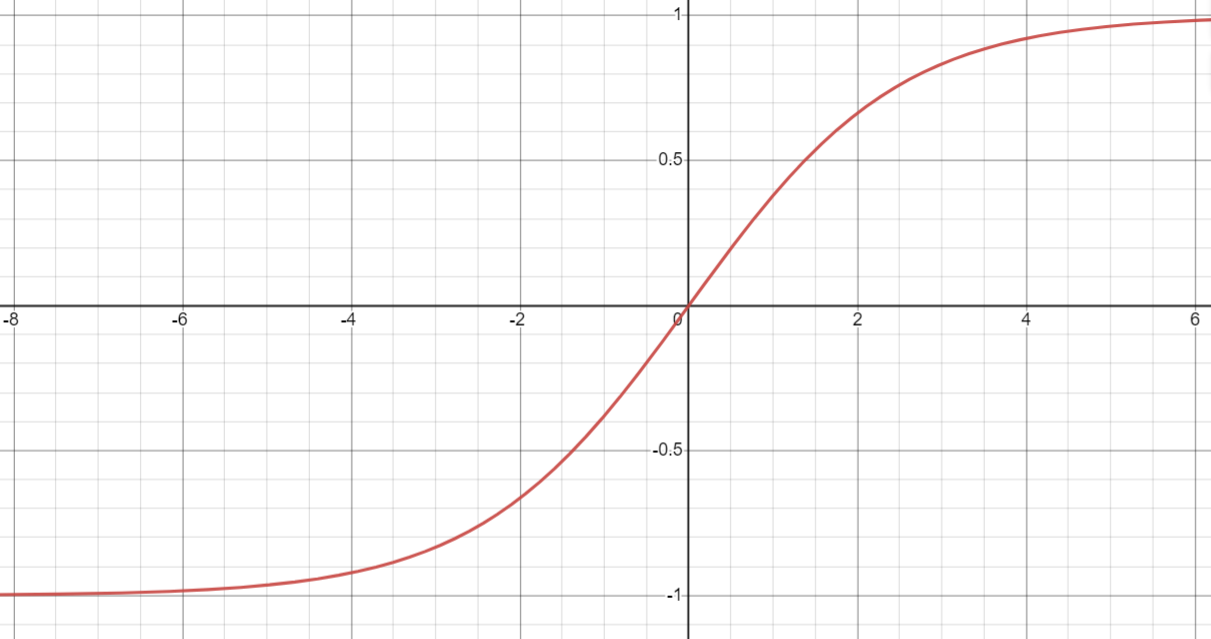


### Calculating scores
Our equation will mirror the activation of a node in a neural network. The score, $s$ be equal to activation function $\sigma$ (in this case $\tanh$) take in a weighted sum of weights $w_n$ and associated values $a_n$:

$$s_n = \sigma \left(\sum_{k=0}^{12} {w_k}{a_k^n}\right)$$

Additionally, this can be represented as a matrix multiplication, where the first matrix has 20 rows (number of colleges to rank) and 12 columns (number of indicators) (which is how these values are ultimately calculated)

$$
\sigma \left(
\begin{bmatrix} 
    a_{1}^1 & \dots  & a_{12}^1\\
    a_{1}^2 & \dots  & a_{12}^2\\
    \vdots & \ddots & \vdots\\
    a_{1}^{19} & \dots  & a_{12}^{19}\\
    a_{1}^{20} & \dots  & b_{12}^{20} 
    \end{bmatrix}
\begin{bmatrix}
w_1\\
\vdots\\
w_{12}
\end{bmatrix}
\right)
=
\begin{bmatrix}
s_1\\
\vdots\\
\vdots\\
s_{20}
\end{bmatrix}
$$




### Getting the weight vector
So now we have good numbers, we can do some math. 
Here are my weightings to the indicators, along with explanations
1. **Academic Reputation (standarded)** lower is better. It determines the merit of your school. Although this is "opinion based," academic reputation can have a big role in employment opportunities
2. **Freshmen in top 10% of highschool class** Shows what type of student gets into this school. If they are overachievers. It can be somewhat of an indicator of the environment present at the college/university. Is it more achieving or laid back?
3. **SAT/ACT Percentiles (standarded)** Higher is better. SAT sccore is an indicator of how well a student does in their first year of college. It also is an indicator of merit, and how competitive the school is.
4. **Acceptance rate** A direct indicator of how competitive a school is. 
5. **Financial resources rank (standarded)** FInancial resources is incredibly important. Some families simply cant afford to spend tens of thousands of dollars for a 4 year education. HOwever, as many colleges want to appeal to a capable, rather than only a rich student body, they offer financial aid. aid is integral to choosing a college.
6. **student-faculty ratio (standarded)** A lower student faculty ratio is better. It means that studens have more staff they can approach for questions and support.
7. **Percent of faculty who are full time** A higher percent of faculty who are full time means that they will be more available to support their students. This means more office hours, indicating students can come with more questions about class material, and not feel rushed
8. **Percent of classes under 20** This goes hand in hand with the student faculty ratio. Smaller classes mean that professors are more available to cater to individual student needs.
9. **Percent of classes with 50 or more** Lower is better. The more classes with 50 or more students means that less students get one on one attention from their teachers.
10. **Average alumni giving rate** This is good, but not that important. 
11. **Average freshman retention rate** When freshmen are thinking of a major, a higher retention rate means that these students are already knowledgable and committed to their field of study. This is an indicator of preparedness and quality of the wide ranges of classes offered at the institution.
12. **6-year grad rate** Since most students graduate within 6 years of attending a college or university, this can be used as a graduation rate. Graduation rate is really important as it is oneof the biggest indicators of whether stuents defalt on their loans. the higher the graduation rate is, the less likely they are to default on loans.

#### Importance
The point of college is to get a good education without breaking bank. This is why our weightings prioritize academic reputation, financial resources, graduation, and student faculty ratio. As these indicators will have the most impact on the financial freedom and quality of education of students. 



In [36]:
weights = {
    'Academic Reputation':-.8, #Lower is better
    '% freshmen in top 10% of HS class':.2, #Higher is better
    'SAT/ACT        25th-75th %ile':.5, #HIGHER IS BETTER
    'acceptance rate ':-.4, #Lower is better
    'financial resources rank':-.8, # LOWER IS BETTER
    'student-faculty ratio':-.7, #LOWER IS BETTER
    '% faculty who are full-time ':.4, #HIGHER IS BETTER
    '% of classes under 20 ':.3, #HIGHER IS BETTER
    '% of classes with 50 or more ': -.3, #lower is better
    'average alumni giving rate':.2, #higher is better
    'average freshman retention rate':.6, #Higher is better
    '6 year grad rate ':.9 #higher is better
}

weights_as_vector = pd.Series([weights[x] for x in weights.keys()])

So the weights would be
$$
w =
\begin{bmatrix}
-0.8\\
0.2\\
0.5\\
-0.4\\
-0.8\\
-0.7\\
0.4\\
0.3\\
-0.3\\
0.2\\
0.6\\
0.9
\end{bmatrix}
$$

### The final equation

Now that we have weights, we can just do the matrix multiplication from earlier.
Expanding this operation, the formula of the score is:
$$s_n = \tanh\left(-0.8a_{1}^n + 0.2a_{2}^n + 0.5a_{3}^n -0.4a_{4}^n -0.8a_{5}^n -0.7a_{6}^n +0.4a_{7}^n +0.3a_{8}^n -0.3a_{9}^n + 0.2a_{10}^n + 0.6a_{11}^n + 0.9a_{12}^n\right)$$

In [37]:

print(coldata.drop(["Name"], axis=1).shape)
print(weights_as_vector.shape)
coldata["score"] = coldata.drop(["Name"], axis=1).dot(weights_as_vector.values)
#coldata["score"] = coldata["score"].apply(lambda x: 1/(1 + np.exp(-x)))
#coldata["score"] = nor malize_score(coldata["score"])
coldata["outputscore"] = standardize_score(coldata["score"], method="tanh")
coldata_sorted = coldata.sort_values("outputscore", ascending=False)
coldata_sorted

(22, 12)
(12,)


,Name,Academic Reputation,% freshmen in top 10% of HS class,SAT/ACT 25th-75th %ile,acceptance rate,financial resources rank,student-faculty ratio,% faculty who are full-time,% of classes under 20,% of classes with 50 or more,average alumni giving rate,average freshman retention rate,6 year grad rate,score,outputscore
20,bestcollege,-1.236278,1.000,1.251302,0.01,-1.242124,-0.840944,1.000,1.000,0.00,1.00,1.00,1.00,5.793034,0.980763
6,Hall U,-1.236278,0.946,0.428967,0.07,-1.014402,-0.206632,0.950,0.795,0.08,0.35,0.97,0.97,4.440370,0.944279
8,Koresh U,-0.494511,0.960,0.703078,0.13,-1.242124,-0.629506,0.984,0.643,0.10,0.36,0.98,0.90,4.348002,0.940134
15,VA Macho Institute,-0.741767,0.970,0.507284,0.08,-1.128263,-0.418069,0.996,0.758,0.07,0.36,0.99,0.96,4.339115,0.939720
18,Whattsamatta U,-1.236278,0.980,0.389808,0.10,-0.672817,-0.100913,0.936,0.626,0.13,0.35,0.98,0.93,3.967020,0.919658
2,Diplomas-R-Us,-1.236278,0.990,0.428967,0.09,-0.217372,-0.312350,0.918,0.713,0.11,0.61,0.98,0.96,3.880149,0.914125
7,Karweit U,-1.236278,0.900,0.154855,0.07,0.010351,-0.312350,0.996,0.704,0.13,0.34,0.98,0.95,3.510415,0.886249
16,Votre Dame,-0.494511,0.970,0.350649,0.10,-0.217372,-0.312350,0.919,0.797,0.07,0.33,0.99,0.96,3.227176,0.859354
17,Wawa U,-0.494511,0.890,0.350649,0.19,-0.445095,-0.206632,0.853,0.778,0.05,0.33,0.98,0.92,3.215252,0.858102
9,Londontown U,-0.494511,0.870,-0.236733,0.21,-0.900540,0.004805,0.980,0.678,0.11,0.38,0.97,0.92,3.132711,0.849146


### Graph

The most useful display of data would be a histogram of the final scores. 

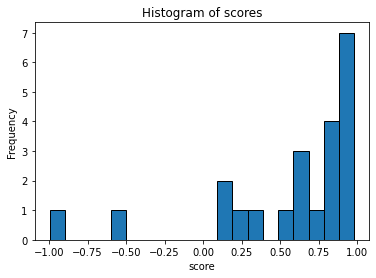

count    22.000000
mean      0.567262
std       0.513729
min      -0.995053
25%       0.422440
50%       0.758371
75%       0.907156
max       0.980763
Name: outputscore, dtype: float64

In [38]:
import matplotlib.pyplot as plt

plt.hist(coldata_sorted["outputscore"], bins=20, edgecolor="black")

# Set the title and labels
plt.title("Histogram of " + "scores")
plt.xlabel("score")
plt.ylabel("Frequency")

# Display the histogram
plt.show()
coldata_sorted["outputscore"].describe()

### Conclusion
Looking at our final results (and ignoring the dummy values `bestcollege` and `worstcollege`), we can see that the best college by the criteria defined above is Hall U with a score of .944279 (4.44037 before $\tanh$). Hall u has the highest possible academic reputation, a low acceptance rate, extremely competitive financial resources and a high graduation rate among other benefits compared to the other colleges in the dataset. Based on our criteria that focuses on potential compensation for education through employment, Hall U takes the cake.


In [39]:
coldata_sorted.iloc[1]

Name                                   Hall U
Academic Reputation                 -1.236278
% freshmen in top 10% of HS class       0.946
SAT/ACT        25th-75th %ile        0.428967
acceptance rate                          0.07
financial resources rank            -1.014402
student-faculty ratio               -0.206632
% faculty who are full-time              0.95
% of classes under 20                   0.795
% of classes with 50 or more             0.08
average alumni giving rate               0.35
average freshman retention rate          0.97
6 year grad rate                         0.97
score                                 4.44037
outputscore                          0.944279
Name: 6, dtype: object